In [7]:
!pip install fsspec

In [8]:
import pandas as pd

In [10]:
df = pd.read_csv("E://Airbus-Ship-Detection//common//train_ship_segmentations_v2.csv")
df

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


In [15]:
df["ImageId"].value_counts()

ImageId
e6fd0c12e.jpg    15
2053a78bd.jpg    15
d3c47b3d3.jpg    15
4de149bd9.jpg    15
c8e722430.jpg    15
                 ..
591ab2331.jpg     1
591af2fb2.jpg     1
591afc23d.jpg     1
591b2dd30.jpg     1
ffffe97f3.jpg     1
Name: count, Length: 192556, dtype: int64

In [52]:
more_than_once = df["ImageId"].value_counts().index[:2]

In [ ]:
from IPython.display import display, Image
import os

In [ ]:
images_path = "E://Airbus-Ship-Detection//common//images//"
masks_path =  "E://Airbus-Ship-Detection//common//masks//"

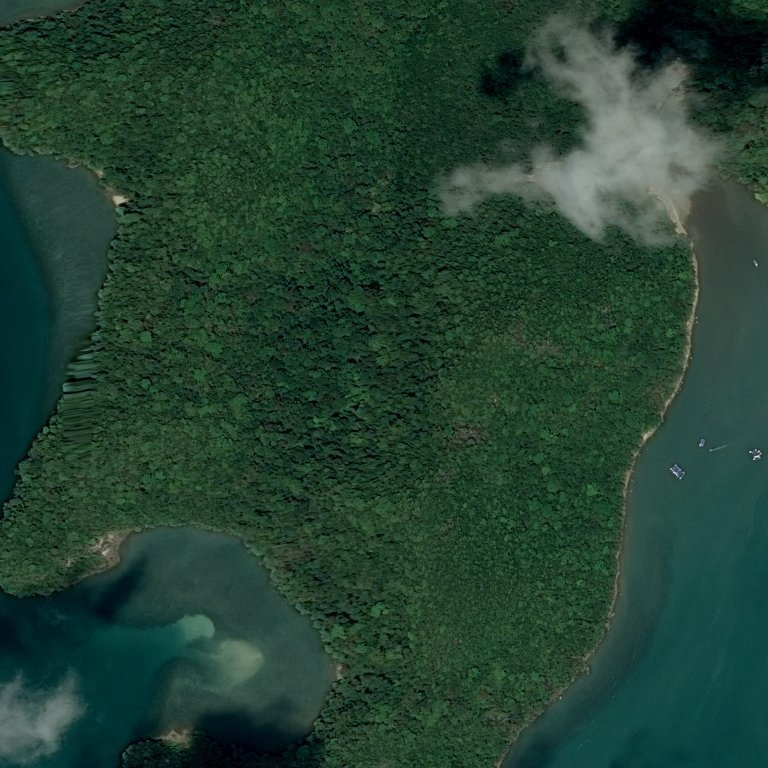

e6fd0c12e.jpg


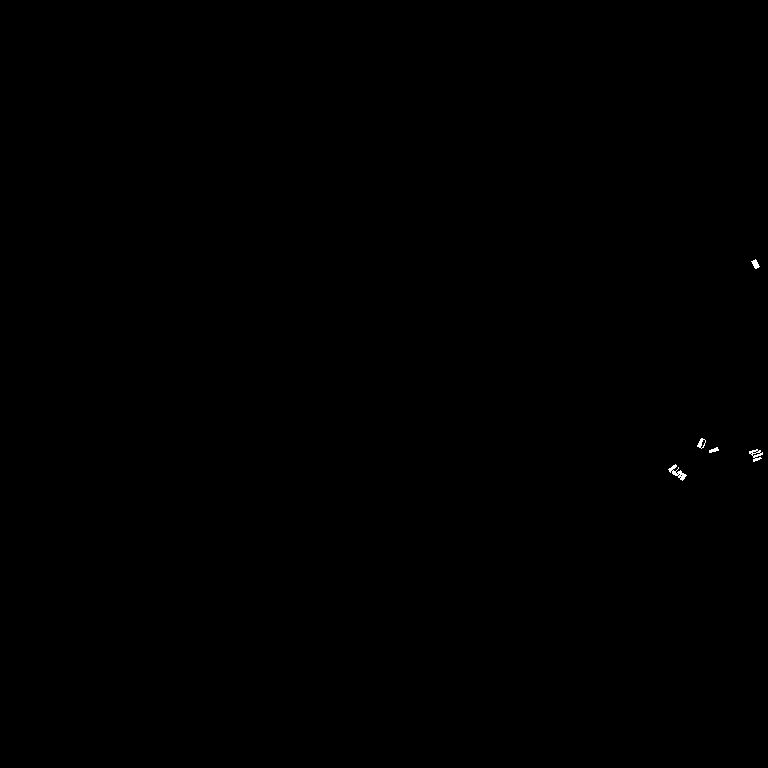

e6fd0c12e.png


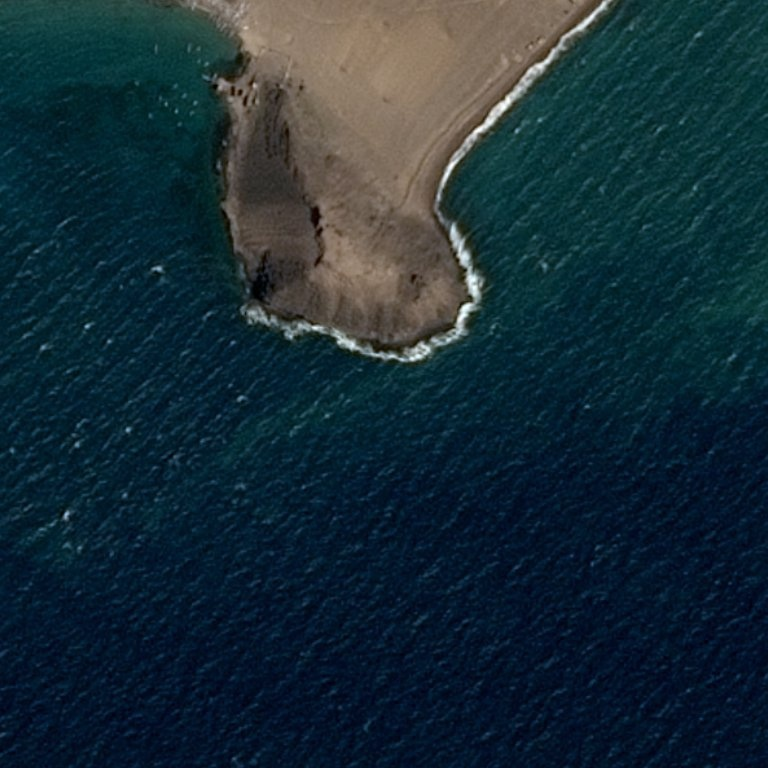

2053a78bd.jpg


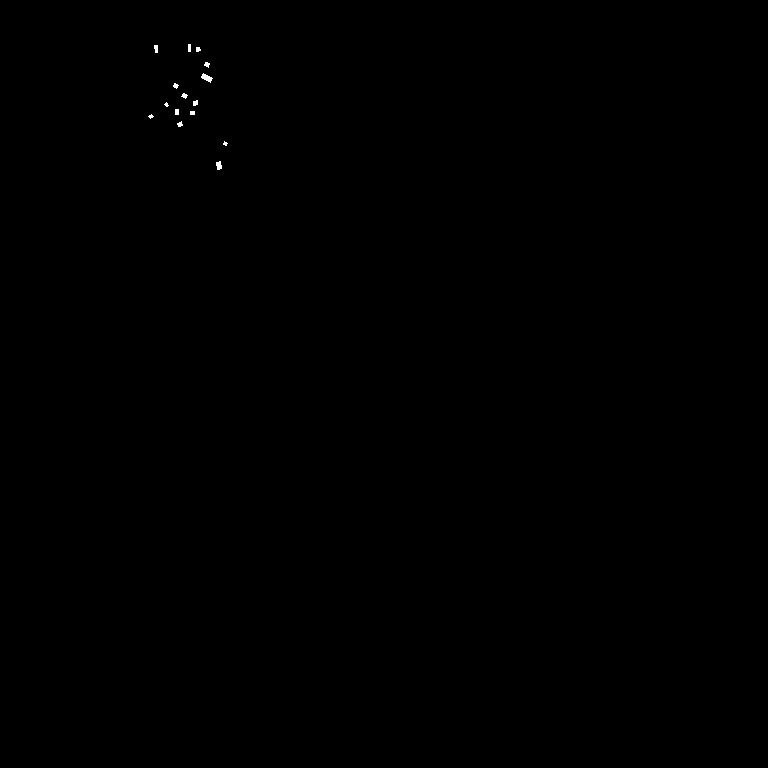

2053a78bd.png


In [61]:
for image_name in more_than_once:
    mask_name = image_name.replace("jpg", "png")
    
    img_path = os.path.join(images_path, image_name)
    mask_path = os.path.join(masks_path, mask_name)
    
    display(Image(filename=img_path))
    print(image_name)
    
    display(Image(filename=mask_path))
    print(mask_name)

In [65]:
nan_masks = df[df['EncodedPixels'].isna()]['ImageId'].sample(2)
nan_masks

214535    ed291febc.jpg
54774     3cdac8440.jpg
Name: ImageId, dtype: object

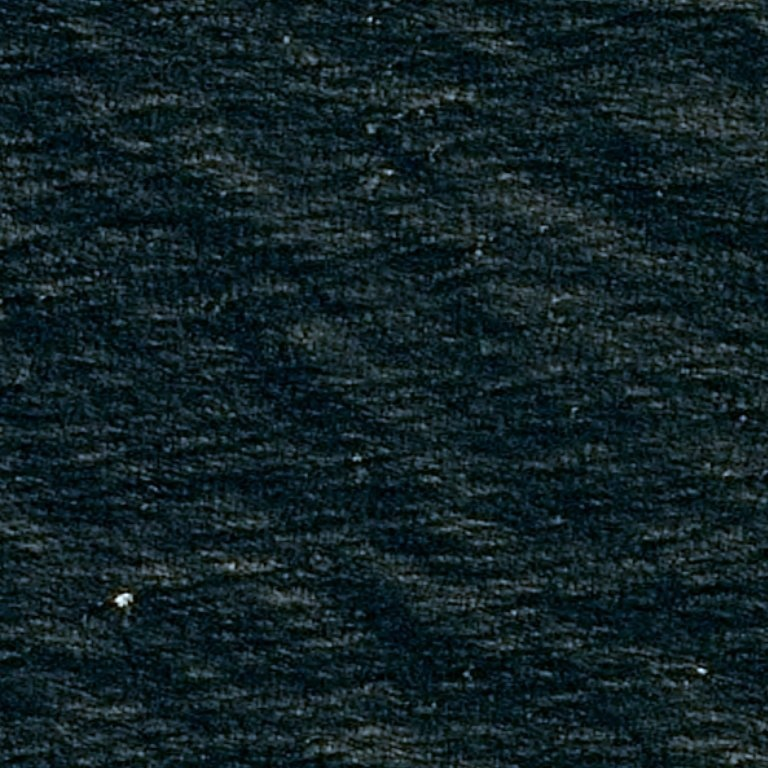

ed291febc.jpg


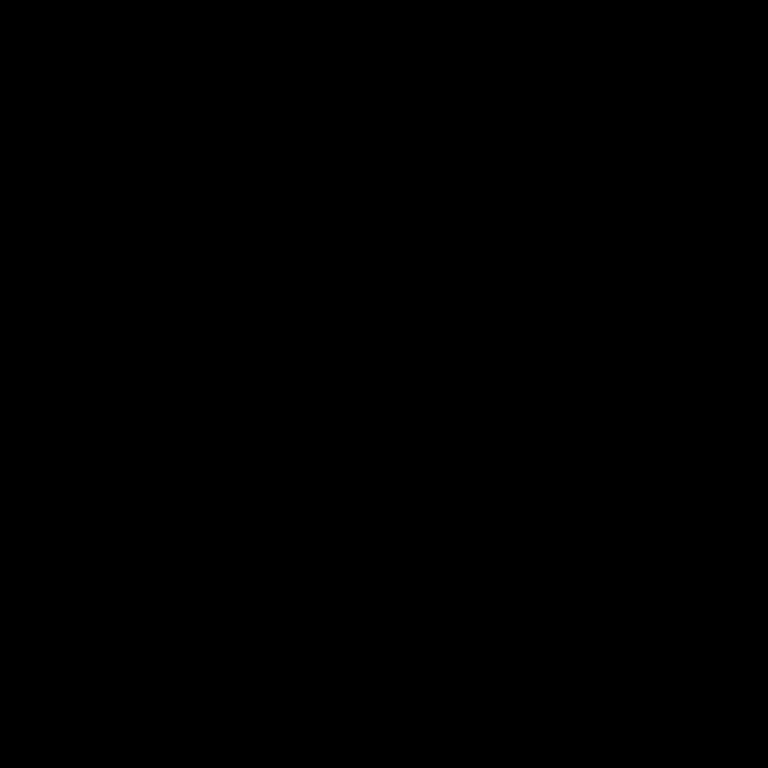

ed291febc.png


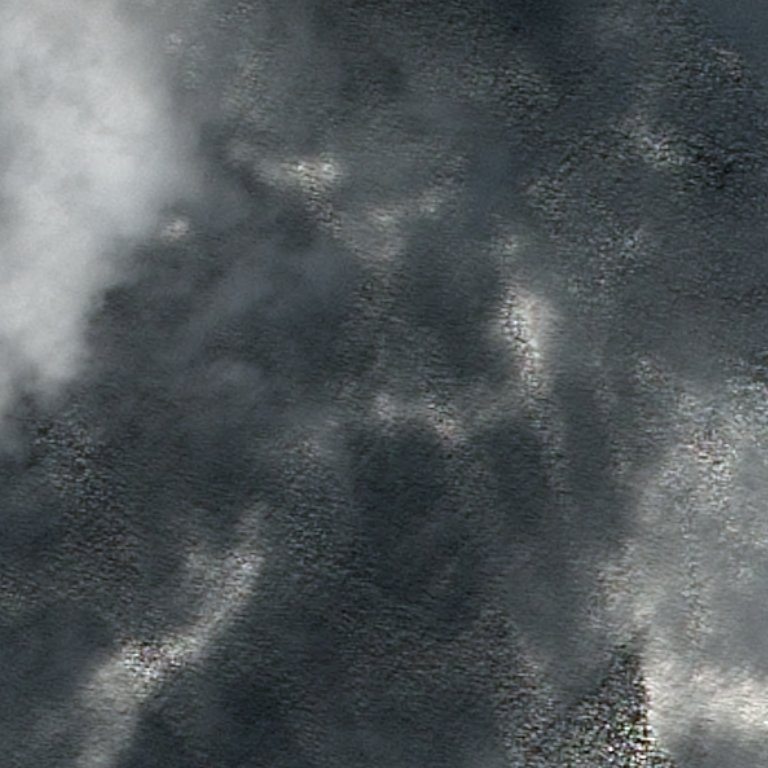

3cdac8440.jpg


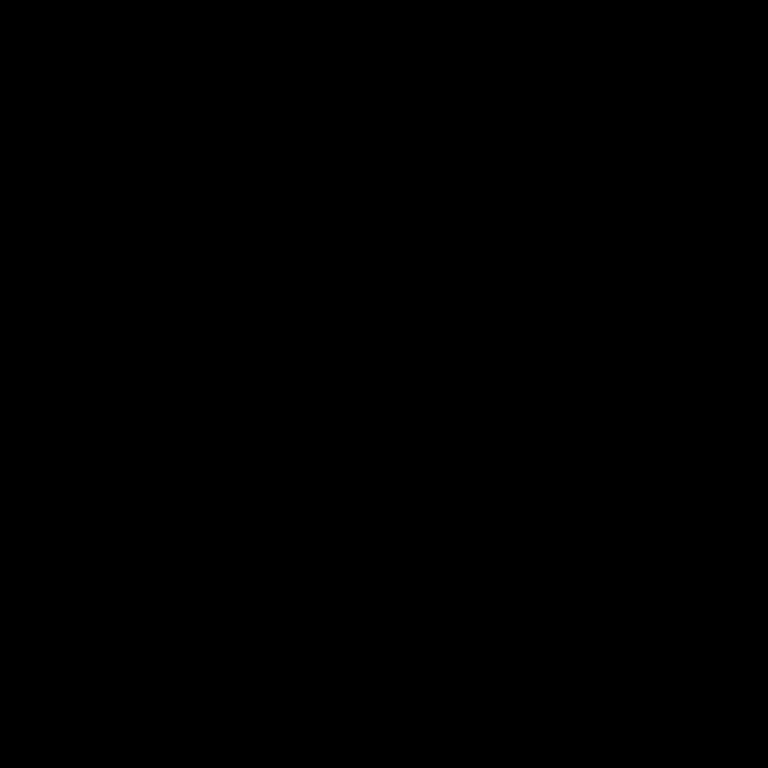

3cdac8440.png


In [70]:
for image_name in nan_masks.values:
    mask_name = image_name.replace("jpg", "png")
    
    img_path = os.path.join(images_path, image_name)
    mask_path = os.path.join(masks_path, mask_name)
    
    display(Image(filename=img_path))
    print(image_name)
    
    display(Image(filename=mask_path))
    print(mask_name)

In [72]:
from PIL import Image

In [73]:
def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height


def check_image_sizes(directory):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print("No image files found in the directory.")
        return

    # Get the size of the first image
    first_image_path = os.path.join(directory, image_files[0])
    first_width, first_height = get_image_size(first_image_path)

    # Check the size of the remaining images
    for image_file in image_files[1:]:
        image_path = os.path.join(directory, image_file)
        width, height = get_image_size(image_path)

        if (width, height) != (first_width, first_height):
            print(f"Image sizes are not the same. {image_file} has a different size.")
            return

    print(f"All image sizes are the same: {(width, height)}.")

In [75]:
check_image_sizes(images_path)

All image sizes are the same: (768, 768).
